## LunarLanderContinuous-v2 (2)

In [1]:
import gym
import random
import torch
import numpy as np

import time
from ddpg_agent_2 import Agent, ReplayBuffer, device
from collections import deque

start_timestep=1e4

from  collections  import deque

env = gym.make('LunarLanderContinuous-v2')
seed = 0
env.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)

state = env.reset()
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0] 
max_action = float(env.action_space.high[0])
threshold = env.spec.reward_threshold
print('threshold: ', threshold)

print('Size of each action:', action_dim)
# examine the state space 
print('Each observes a state with length: {}', state_dim)
print('The state for the first agent looks like:', state[0])

import matplotlib.pyplot as plt
%matplotlib inline
agent = Agent(state_size=state_dim, action_size=action_dim, random_seed=8)


threshold:  200
Size of each action: 2
Each observes a state with length: {} 8
The state for the first agent looks like: -0.00059156417


In [2]:
def ddpg(n_episodes=20000, print_every=10):
    scores_deque = deque(maxlen=100)
    scores_array = []
    avg_scores_array = [] 
        
    time_start = time.time()
    
    timestep_after_last_save = 0
    total_timesteps = 0
        
    for i_episode in range(1, n_episodes+1):
        state = env.reset()                                    # set the environment    
        agent.reset()
        score_average = 0
        
        timestep = 0
        total_reward = 0
        
        done = False

        while True:
            action = agent.act(state)
                        
            # Perform action
            next_state, reward, done, _ = env.step(action) 
            done_bool = 0 if timestep + 1 == env._max_episode_steps else float(done)
            total_reward += reward                          # full episode reward
        
            ## def step(self, states, actions, rewards, next_states, dones, timestep):
            agent.step(state, action, reward, next_state, done, timestep)
            state = next_state                               # roll over states to next time step
            
            timestep += 1     
            total_timesteps += 1
            timestep_after_last_save += 1

            if done:                                  # exit loop if episode finished
                break
        
        scores_deque.append(total_reward)
        scores_array.append(total_reward)

        avg_score = np.mean(scores_deque)
        avg_scores_array.append(avg_score)
        
        # train_by_episode(time_start, i_episode) 
        s = (int)(time.time() - time_start)
                        
        if i_episode % print_every == 0 or (len(scores_deque) == 100 and np.mean(scores_deque) >= threshold) :
            #torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            #torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            s = (int)(time.time() - time_start) 
            print('Episode {} Score: {:.2f} Average Score: {:.2f}, Time: {:02}:{:02}:{:02} ***    '\
                  .format(i_episode, total_reward, avg_score, s//3600, s%3600//60, s%60))  
            
        if len(scores_deque) == 100 and np.mean(scores_deque) >= threshold:  
            print('Environment solved !   ')
            break
            
    return scores_array, avg_scores_array

scores, avg_scores = ddpg()
    

Episode 10 Score: -243.00 Average Score: -499.66, Time: 00:00:04 ***    
Episode 20 Score: -221.11 Average Score: -388.73, Time: 00:00:07 ***    
Episode 30 Score: -283.71 Average Score: -368.27, Time: 00:00:12 ***    
Episode 40 Score: -214.29 Average Score: -356.48, Time: 00:00:17 ***    
Episode 50 Score: -694.16 Average Score: -419.16, Time: 00:00:22 ***    
Episode 60 Score: -852.83 Average Score: -479.78, Time: 00:00:29 ***    
Episode 70 Score: -103.90 Average Score: -478.58, Time: 00:00:33 ***    
Episode 80 Score: -423.87 Average Score: -461.26, Time: 00:00:39 ***    
Episode 90 Score: -225.83 Average Score: -434.01, Time: 00:00:43 ***    
Episode 100 Score: -225.10 Average Score: -405.73, Time: 00:00:48 ***    
Episode 110 Score: -290.55 Average Score: -373.16, Time: 00:00:52 ***    
Episode 120 Score: -200.32 Average Score: -365.94, Time: 00:00:57 ***    
Episode 130 Score: -204.53 Average Score: -354.72, Time: 00:01:01 ***    
Episode 140 Score: -121.82 Average Score: -344.

Episode 2220 Score: 191.72 Average Score: 79.75, Time: 04:01:23 ***    
Episode 2230 Score: -80.08 Average Score: 70.45, Time: 04:03:34 ***    
Episode 2240 Score: -72.91 Average Score: 56.07, Time: 04:05:24 ***    
Episode 2250 Score: -44.07 Average Score: 42.13, Time: 04:07:11 ***    
Episode 2260 Score: -79.20 Average Score: 38.47, Time: 04:09:10 ***    
Episode 2270 Score: 153.42 Average Score: 31.77, Time: 04:11:08 ***    
Episode 2280 Score: 192.13 Average Score: 25.83, Time: 04:13:17 ***    
Episode 2290 Score: -90.95 Average Score: 6.51, Time: 04:15:23 ***    
Episode 2300 Score: -42.49 Average Score: -5.04, Time: 04:17:12 ***    
Episode 2310 Score: 141.57 Average Score: -2.20, Time: 04:18:31 ***    
Episode 2320 Score: 174.04 Average Score: 6.91, Time: 04:19:56 ***    
Episode 2330 Score: -57.79 Average Score: 17.63, Time: 04:21:17 ***    
Episode 2340 Score: 201.17 Average Score: 30.01, Time: 04:22:35 ***    
Episode 2350 Score: 201.22 Average Score: 47.50, Time: 04:23:30 **

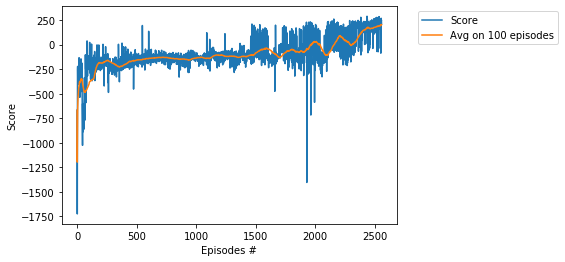

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores, label="Score")
plt.plot(np.arange(1, len(avg_scores)+1), avg_scores, label="Avg on 100 episodes")
plt.legend(bbox_to_anchor=(1.05, 1)) 
plt.ylabel('Score')
plt.xlabel('Episodes #')
plt.show()

In [4]:
def save(agent, filename, directory):
    torch.save(agent.actor_local.state_dict(), '%s/%s_actor_local.pth' % (directory, filename))
    torch.save(agent.actor_target.state_dict(), '%s/%s_actor_target.pth' % (directory, filename))
    torch.save(agent.critic_local.state_dict(), '%s/%s_critic_local.pth' % (directory, filename))
    torch.save(agent.critic_target.state_dict(), '%s/%s_critic_target.pth' % (directory, filename))


save(agent, 'LunarLanderContinuous-v2', 'dir_chk_2')